In [144]:
from funcs.notebook import *

from lightkurve import search_lightcurvefile
from altaipony.lcio import from_mast
from altaipony.flarelc import FlareLightCurve


In [145]:
ff = pd.read_csv("../results/flares.csv")
f= ff.dropna().drop_duplicates(subset=["ID", "qcs","istart"])
ff

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points,ID,qcs,mission,tstamp,dur_detrend,lc_n
0,6112.0,6127.0,140855.0,140870.0,1423.092737,1423.113571,4.720352,0.211319,0.004199,0.020833,14306.0,WASP-77 A,4,TESS,04_02_2021_11_34_29,2.413604,0
1,6134.0,6140.0,140877.0,140883.0,1423.123293,1423.131626,2.499234,0.268311,0.005336,0.008333,14306.0,WASP-77 A,4,TESS,04_02_2021_11_34_29,2.413604,0
2,71800.0,71803.0,4052675.0,4052678.0,2165.578816,2165.579511,0.723567,0.069119,0.014784,0.000694,88637.0,WASP-77 A,31,TESS,04_02_2021_11_35_14,22.145443,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14683.0,WASP-77 A,31,TESS,04_02_2021_11_35_17,2.186492,1
4,17293.0,17297.0,170430.0,170434.0,1464.167181,1464.172737,29.232788,3.400270,0.075336,0.005555,17371.0,NGTS-6,5,TESS,04_02_2021_11_35_39,5.857953,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16605.0,HAT-P-14,26,TESS,04_02_2021_12_54_20,2.628742,0
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15616.0,GJ 1132,9,TESS,04_02_2021_12_54_39,2.242597,0
204,8318.0,8323.0,257978.0,257983.0,1585.761463,1585.768408,6.663345,0.543845,0.016775,0.006944,15290.0,GJ 1132,10,TESS,04_02_2021_12_55_04,5.070231,0
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17968.0,TOI-1235,14,TESS,04_02_2021_12_55_26,2.614281,0


In [146]:
f.shape, ff.dropna().shape

((54, 17), (54, 17))

In [147]:
gf = f[["ID","qcs","mission",'tstamp']].drop_duplicates(subset=["ID","qcs","mission"])

In [148]:
gf

,ID,qcs,mission,tstamp
0,WASP-77 A,4,TESS,04_02_2021_11_34_29
2,WASP-77 A,31,TESS,04_02_2021_11_35_14
4,NGTS-6,5,TESS,04_02_2021_11_35_39
12,WASP-61,5,TESS,04_02_2021_11_37_49
33,HATS-14,1,TESS,04_02_2021_11_45_42
43,HATS-44,5,TESS,04_02_2021_11_50_21
49,WASP-138,31,TESS,04_02_2021_11_52_57
66,WASP-100,27,TESS,04_02_2021_12_00_19
68,WASP-100,28,TESS,04_02_2021_12_01_31
86,TOI-125,28,TESS,04_02_2021_12_09_49


In [151]:
row = gf.iloc[-1]

# plot all flares for a light curve at once
ID, qcs = row.ID, int(row.qcs)
sdf = f[(f.qcs == qcs) & (f.ID == ID) & (f.mission == row.mission)]

lc = from_mast(ID,c=qcs,mission=row.mission,cadence="short", )

# make it a list of LCs even if only one LC is returned
if type(lc) == FlareLightCurve:

    lc = [lc]

elif type(lc) == list:

    lc = lc
tts = np.array([(l.time[0], l.time[-1]) for l in lc])


4% (815/18900) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
4% (815/18900) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-1.0.0-py3.6.egg/altaipony/lcio.py:114: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/.lightkurve-cache/mastDownload/TESS/tess2019085135100-s0010-0000000101955023-0140-s/tess2019085135100-s0010-0000000101955023-0140-s_lc.fits' mode='rb' closefd=True>
  c)


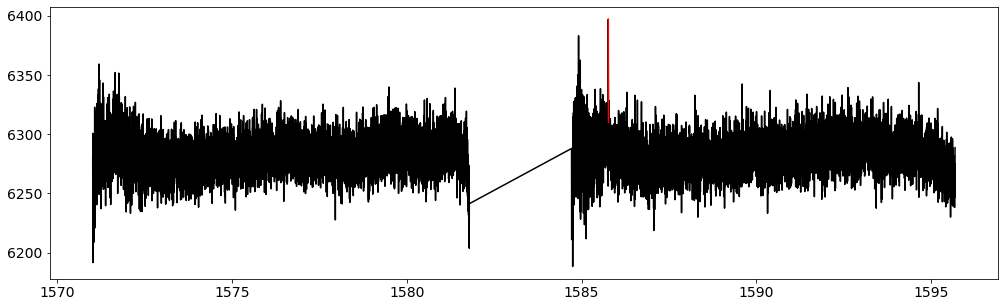

In [155]:
%matplotlib inline
for i, row in sdf.iterrows():
    plt.figure(figsize=(17,5))
    ts, tf = row.tstart, row.tstop
    
    # pick
    nlc = np.where((ts>tts)[:,0] != (ts>tts)[:,1])[0][0]
    LC = lc[nlc]
    cad=1
    if row.mission=="TESS":
        LC = lc[0]
        cad=5
        
    _ = LC[np.where((LC.time>=ts-.2/cad) & (LC.time<=tf+.2/cad))]
    plt.plot(_.time, _.flux, c="k")

    _ = LC[np.where((LC.time>=ts) & (LC.time<=tf))]
    plt.plot(_.time, _.flux, c="r")

In [130]:
from lightkurve import search_targetpixelfile

In [143]:
tpf = search_targetpixelfile(ID,sector=qcs,mission="TESS").download()

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/lightkurve/search.py:233: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)
6% (6230/109893) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
6% (6230/109893) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/.lightkurve-cache/mastDownload/TESS/tess2020212050318-s0028-0000000055652896-0190-a_fast/tess2020212050318-s0028-0000000055652896-0190-a_fast-tp.fits' mode='rb' closefd=True>
  """Entry point for launching an IPython kernel.


In [134]:
tpf[:25000].interact()

0% (0/25000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
0% (0/25000) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


INFO:bokeh.server.server:Starting Bokeh server version 2.0.0 (running on Tornado 6.0.4)
INFO:bokeh.server.tornado:User authentication hooks NOT provided (default user enabled)


200 GET /autoload.js?bokeh-autoload-element=10428&bokeh-absolute-url=http://localhost:42587&resources=none (127.0.0.1) 1486.70ms
101 GET /ws (127.0.0.1) 0.54ms
INFO:bokeh.server.views.ws:WebSocket connection opened
INFO:bokeh.server.views.ws:ServerConnection created


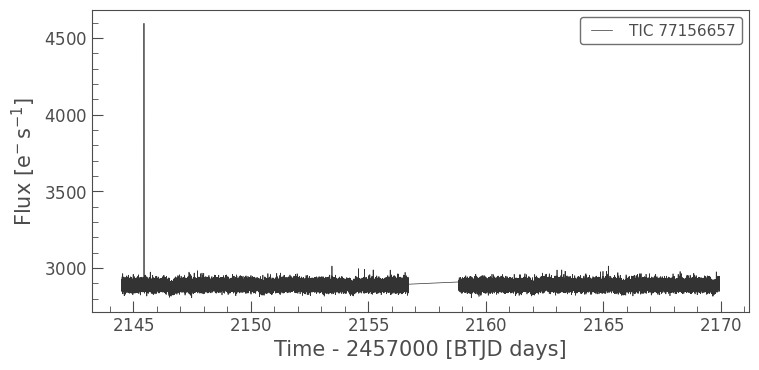

In [142]:
lc[0].plot()
# plt.xlim(2070.28,2070.31)